In [1]:
import pandas as pd
import umap
from sklearn.manifold import TSNE
import time
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("mRna_sorted_out.csv")
cancer_genes = pd.read_csv("cancer_genes.csv", header = None)

In [2]:
#data.head
patient = data.iloc[:][1:].T
patient = patient.drop(['Unnamed: 0'])
#patient = patient.values.reshape(1,-1).T

In [6]:
patient.shape

(20172, 293)

In [3]:
# Section to extract the cancer gene indices
genes = cancer_genes.iloc[:][0]                 #import gene list 
latent_location = []
for i in genes:
    try:
        location = data.columns.get_loc(i)      #get gene location
        latent_location.append(location)
    except:
        print(i, "Not Located")                 #if gene not present in data
        latent_location.append("Not Located")
        continue

gene_location = pd.DataFrame(latent_location)
#print(gene_location)

KAT6A Not Located
KMT2D Not Located


In [4]:
# extract  location and label of cancer gene
a = cancer_genes.iloc[:][2]
a = a.to_numpy()
gene_location[1] = pd.Series(a, index=gene_location.index)

gene_location.drop([gene_location.index[40],gene_location.index[43]], inplace = True)   #gene 40 and 43 are not in our data
gene_location.reset_index(inplace = True)
gene_location = gene_location.drop(columns=['index'])

In [5]:
#
color_idx = pd.DataFrame(index=range(0, 20172),columns=range(1))

for j in range(0, 82):
    print("step", j, "of 83")
    for i in range(0, 20172):
        if i == gene_location.iloc[j][0]:
            color_idx.iloc[i] = gene_location.iloc[j][1]
            break
        else:
            continue

step 0 of 83
step 1 of 83
step 2 of 83
step 3 of 83
step 4 of 83
step 5 of 83
step 6 of 83
step 7 of 83
step 8 of 83
step 9 of 83
step 10 of 83
step 11 of 83
step 12 of 83
step 13 of 83
step 14 of 83
step 15 of 83
step 16 of 83
step 17 of 83
step 18 of 83
step 19 of 83
step 20 of 83
step 21 of 83
step 22 of 83
step 23 of 83
step 24 of 83
step 25 of 83
step 26 of 83
step 27 of 83
step 28 of 83
step 29 of 83
step 30 of 83
step 31 of 83
step 32 of 83
step 33 of 83
step 34 of 83
step 35 of 83
step 36 of 83
step 37 of 83
step 38 of 83
step 39 of 83
step 40 of 83
step 41 of 83
step 42 of 83
step 43 of 83
step 44 of 83
step 45 of 83
step 46 of 83
step 47 of 83
step 48 of 83
step 49 of 83
step 50 of 83
step 51 of 83
step 52 of 83
step 53 of 83
step 54 of 83
step 55 of 83
step 56 of 83
step 57 of 83
step 58 of 83
step 59 of 83
step 60 of 83
step 61 of 83
step 62 of 83
step 63 of 83
step 64 of 83
step 65 of 83
step 66 of 83
step 67 of 83
step 68 of 83
step 69 of 83
step 70 of 83
step 71 of 83
st

In [6]:
color_idx = color_idx.fillna(1)
color_idx.to_csv("color_idx.csv", index = None)

In [12]:
def f_tsne(perplex,dist):
    tsne = TSNE(n_components=2,verbose=0,perplexity=perplex,n_iter=1000, metric=dist)
    tsne_results = tsne.fit_transform(patient)
    df_subset = pd.DataFrame()
    df_subset['tsne-2d-one'] = tsne_results[:,0]
    df_subset['tsne-2d-two'] = tsne_results[:,1]

    final_df = pd.DataFrame(tsne_results, index=range(tsne_results.shape[0]), columns=range(tsne_results.shape[1]))
    final_df = pd.concat([final_df,color_idx], axis=1)
    final_df.columns = ['a', 'b', 'c']

    only_cancer_genes = final_df.loc[final_df['c']>=2] 

    plt.clf()

    # t_SNE
    plot_tsne = sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",data=df_subset,legend="full",alpha=0.1).set_title('tsne-plot-perplexity_' + dist + '___' +str(perplex)+ '_')
    plot_tsne.figure.savefig('plots/tsne-plot-perplexity_'+ dist + '___'+ str(perplex)+ '.svg', format = 'svg', dpi = 1200)
    
    # with_gene_plot
    plt.clf()

    plot_tsne_gene = sns.scatterplot('a', 'b', data=final_df, hue = 'c', size = 'c', legend = "full").set_title('tsne-with-gene-perplexity_' + dist + '___' +str(perplex)+ '_')
    plot_tsne_gene.figure.savefig('plots/tsne-with-gene-plot-perplexity_'+ dist + '___'+ str(perplex)+ '.svg', format = 'svg', dpi = 1200)

    #only_gene_plot
    plt.clf()
    
    plot_tsne_cancer_genes = sns.scatterplot('a', 'b', data=only_cancer_genes, hue = 'c', palette=['green','orange','brown','dodgerblue','red', 'magenta', 'cyan', 'black', 'blue', 'yellow']).set_title('tsne-with-only-gene-perplexity_' + dist + '___' +str       (perplex)+ '_')
    plot_tsne_cancer_genes.figure.savefig('plots/tsne-with-only-gene-plot-perplexity_'+ dist + '___'+ str(perplex)+ '.svg', format = 'svg', dpi = 1200)


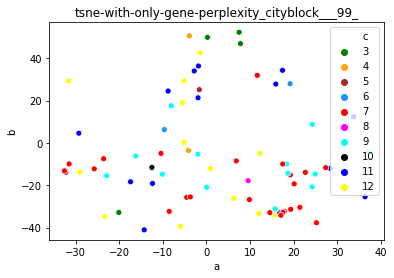

In [14]:
dist = ['euclidean', 'cosine', 'cityblock']
for i in range(2,100):
    for j in dist:
        f_tsne(i,j) 

In [15]:
#UMAP
import umap
reducer = umap.UMAP(n_neighbors=7, metric = 'euclidean', min_dist= 0.0)
umap_result = reducer.fit_transform(patient)
umap_result.shape

/home/titan6/anaconda3/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../anaconda3/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/titan6/anaconda3/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../anaconda3/lib/python3.7/site-packages/uma

(20172, 2)

In [16]:
final_df_umap = pd.DataFrame(umap_result, index=range(umap_result.shape[0]), columns=range(umap_result.shape[1]))
final_df_umap = pd.concat([final_df_umap,color_idx], axis=1)
final_df_umap.columns = ['a', 'b', 'c']

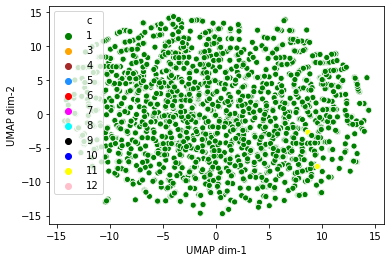

In [19]:
import seaborn as sns
plot_umap = sns.scatterplot('a', 'b', data=final_df_umap, hue = 'c', palette=['green','orange','brown','dodgerblue','red', 'magenta', 'cyan', 'black', 'blue', 'yellow', 'pink'])
plot_umap.set_xlabel("UMAP dim-1")
plot_umap.set_ylabel("UMAP dim-2")
plot_umap.figure.savefig("umap_p3_mindis0.svg", format = 'svg', dpi = 1200)
plot_umap

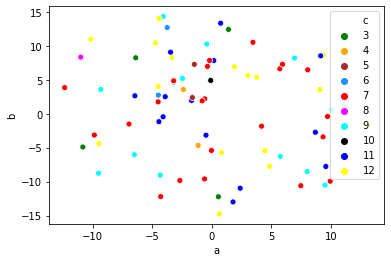

In [18]:
df_umap = final_df_umap.loc[final_df_umap['c']>=2]
plot_umap = sns.scatterplot('a', 'b', data=df_umap, hue = 'c', palette=['green','orange','brown','dodgerblue','red', 'magenta', 'cyan', 'black', 'blue', 'yellow'])
plot.set_xlabel("UMAP dim-1")
plot.set_ylabel("UMAP dim-2")
plot_umap.figure.savefig("umap_p3_genes.svg", format = 'svg', dpi = 1200)

In [15]:
#TSNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=250)
tsne_results = tsne.fit_transform(patient)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 20172 samples in 0.243s...
